# Create the dataframe

In [8]:
import pandas as pd
housing_data = pd.read_csv("Data/KingCountyHousing.csv")
# housing_data.head()

Here we have 21 Columns with 19 Features, and 21613 Observations.

# Fix the date

In [13]:
import datetime
current_year = datetime.datetime.now().year
housing_data["age_of_house"] = current_year - pd.to_datetime(
    housing_data["date"]).dt.year

We've now added a column for the age of the home, which will help us analyze the pricing.

In [14]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
age_of_house     21613 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

In [15]:
housing_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_of_house'],
      dtype='object')

# Select features and dependent variable

In [65]:
feature_cols = [ 
    u'age_of_house',  
    u'bedrooms', 
    u'bathrooms', 
    u'sqft_living',
    u'sqft_lot', 
    u'floors', 
    u'waterfront', 
    u'view',
    u'condition', 
    u'grade',
    u'sqft_above', 
    u'sqft_basement', 
    u'yr_built', 
    u'yr_renovated',
    u'zipcode',
    u'lat',
    u'long',]
x = housing_data[feature_cols]
y = housing_data["price"]

# Visualize the features against the dependent variable

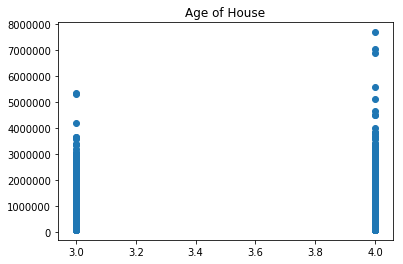

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Age of House")
plt.scatter(housing_data["age_of_house"],housing_data["price"])

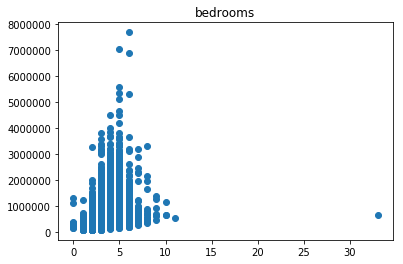

In [20]:
plt.title("bedrooms")
plt.scatter(housing_data["bedrooms"],housing_data["price"])

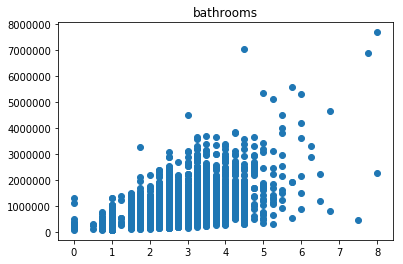

In [22]:
plt.title("bathrooms")
plt.scatter(housing_data["bathrooms"],housing_data["price"])

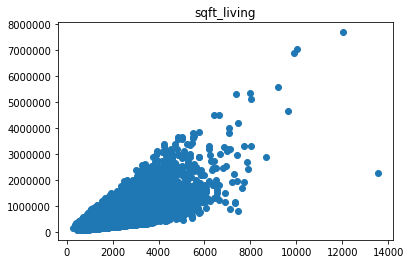

In [23]:
plt.title("sqft_living")
plt.scatter(housing_data["sqft_living"],housing_data["price"])

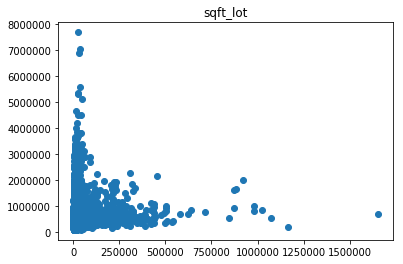

In [24]:
plt.title("sqft_lot")
plt.scatter(housing_data["sqft_lot"],housing_data["price"])

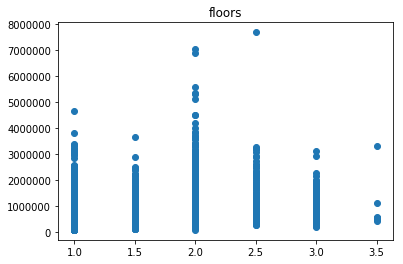

In [25]:
plt.title("floors")
plt.scatter(housing_data["floors"],housing_data["price"])

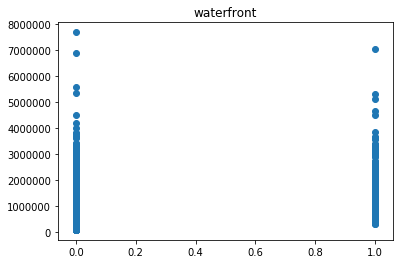

In [26]:
plt.title("waterfront")
plt.scatter(housing_data["waterfront"],housing_data["price"])

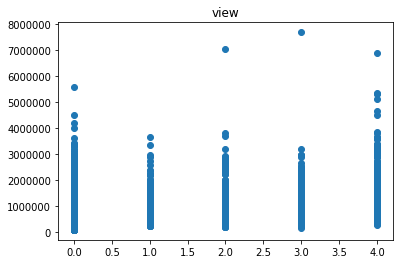

In [27]:
plt.title("view")
plt.scatter(housing_data["view"],housing_data["price"])

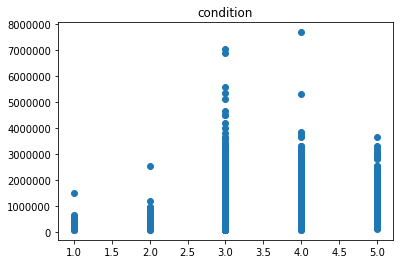

In [28]:
plt.title("condition")
plt.scatter(housing_data["condition"],housing_data["price"])

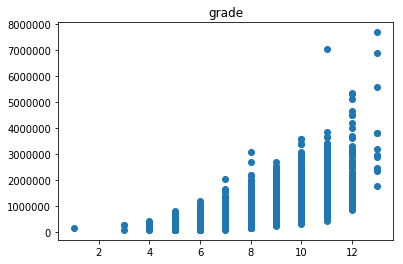

In [29]:
plt.title("grade")
plt.scatter(housing_data["grade"],housing_data["price"])

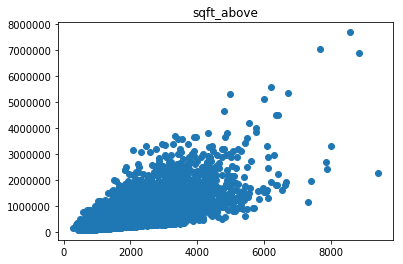

In [30]:
plt.title("sqft_above")
plt.scatter(housing_data["sqft_above"],housing_data["price"])

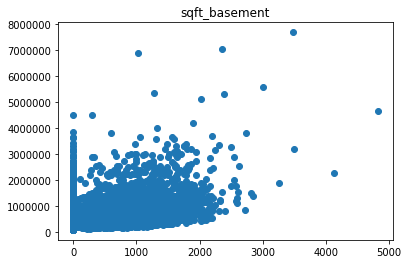

In [31]:
plt.title("sqft_basement")
plt.scatter(housing_data["sqft_basement"],housing_data["price"])

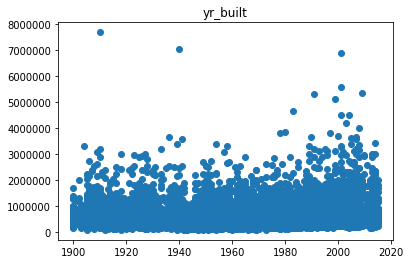

In [32]:
plt.title("yr_built")
plt.scatter(housing_data["yr_built"],housing_data["price"])

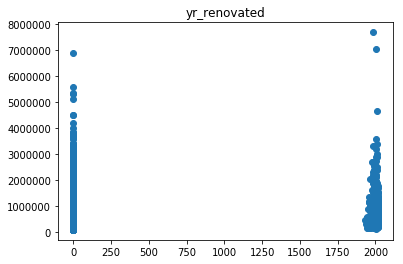

In [33]:
plt.title("yr_renovated")
plt.scatter(housing_data["yr_renovated"],housing_data["price"])

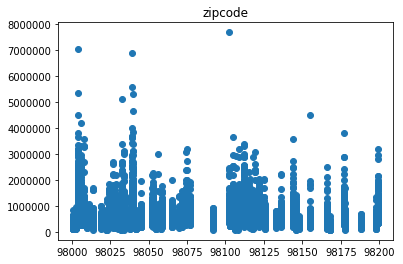

In [66]:
plt.title("zipcode")
plt.scatter(housing_data["zipcode"],housing_data["price"])

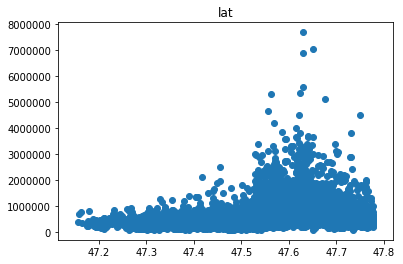

In [67]:
plt.title("lat")
plt.scatter(housing_data["lat"],housing_data["price"])

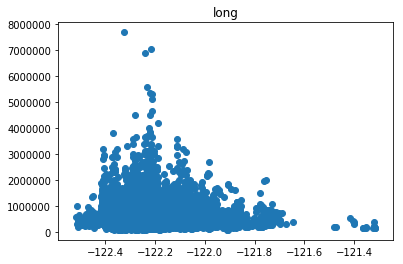

In [68]:
plt.title("long")
plt.scatter(housing_data["long"],housing_data["price"])

# Split the training and test data

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.2, random_state=3)

# Fitting the model to the training set

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

accuracy = regressor.score(x_test, y_test)
print(accuracy)

0.709354281043


In [78]:
# Building the optimal model using Backward Elimination
def backwardElim(X_opt, SL):
    regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
    for i in range(np.size(X_opt,1)):
        if regressor_OLS.pvalues[i] > SL:
            if regressor_OLS.pvalues[i] == max(regressor_OLS.pvalues):
                print(regressor_OLS.summary())
                print("removing: "+str(i)+", with P val: "+str(regressor_OLS.pvalues[i]))
                return backwardElim(np.delete(X_opt, i, axis=1), SL)
    return X_opt

In [92]:
import statsmodels.formula.api as sm
X = np.append(arr =np.ones((21613,1)).astype(int), values = x, axis = 1)
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
SL = 0.05

X_opt = backwardElim(X_opt, SL)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3155.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:03:35   Log-Likelihood:            -2.9458e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21596   BIC:                         5.893e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.362e+06   2.88e+06      3.254      0.0

In [94]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3604.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:04:38   Log-Likelihood:            -2.9458e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21598   BIC:                         5.893e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.969e+06    2.8e+06      2.843      0.004    2.48e+06    1.35e+07
x1         -3.029e+04   2932.588    -10.328      0.000    -3.6e+04   -2.45e+04
x2         -3.551e+04   1881.707    -18.873      0.000   -3.92e+04   -3.18e+04
x3          4.259e+04   3129.276     13.609      0.000    3.65e+04    4.87e+04
x4           113.8393      2.086     54.579      0.000     109.751     117.928
x5          5.802e+05   1.73e+04     33.472      0.000    5.46e+05    6.14e+05
x6          5.438e+04   2109.328     25.780      0.000    5.02e+04    5.85e+04
x7          2.674e+04   2346.953     11.392      0.000    2.21e+04    3.13e+04
x8          1.004e+05   2057.200     48.782      0.000    9.63e+04    1.04e+05
x9            75.4452      1.989     37.939      0.000      71.547      79.343
x10           38.3951      2.400     16.001      0.000      33.692      43.098
x11        -2605.2632     70.616    -36.894      0.000   -2743.675   -2466.851
x12           19.7064      3.641      5.412      0.000      12.569      26.844
x13         -598.1506     32.625    -18.334      0.000    -662.097    -534.204
x14         6.125e+05   1.06e+04     57.520      0.000    5.92e+05    6.33e+05
x15        -2.137e+05   1.26e+04    -16.908      0.000   -2.39e+05   -1.89e+05
==============================================================================
Omnibus:                    18154.830   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1781798.770
Skew:                           3.503   Prob(JB):                         0.00
Kurtosis:                      46.926   Cond. No.                     7.65e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.56e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Removed 'floors' and 'waterfront' 70% accuracy